In [1]:
from pathlib import Path

import matplotlib.pyplot as plt 
import pandas as pd
import xarray as xr 

from xcube.core.store import new_data_store 
from xcube.webapi.viewer import Viewer 

In [2]:
path = "C:/Users/Norman/Brockmann Consult GmbH/xcube - Documents/Development/EASE-Grid/INRAE_Bordeaux_annual2022_AGC_from_SMOS_IC_LVOD_V1.nc"

In [3]:
def sanitize_inrae_agc_dataset(ds):
    # adjust time coords
    years = ds['time'].values  # e.g., array([2010., 2011., ..., 2022.])
    date_strings = [f"{int(year)}-01-01" for year in years]
    datetime_index = pd.to_datetime(date_strings)
    ds = ds.assign_coords(time=datetime_index)    
    # adjust FillValue Attr
    for var_name in ds.data_vars:
        if "FillValue" in ds[var_name].attrs:
            ds[var_name].attrs["FillValue"] = -9999.0
    return ds

In [4]:
store = new_data_store("file", root=str(Path(path).parent))

In [5]:
store.list_data_ids()

['INRAE_Bordeaux_annual2022_AGC_from_SMOS_IC_LVOD_V1.nc']

In [6]:
ds = store.open_data('INRAE_Bordeaux_annual2022_AGC_from_SMOS_IC_LVOD_V1.nc')
ds = sanitize_inrae_agc_dataset(ds)

In [7]:
x_delta = ds.lon.diff("lon")
y_delta = ds.lat.diff("lat")

x_delta

<xarray.DataArray 'lon' (lon: 1387)> Size: 6kB
array([0.2593689 , 0.2593689 , 0.25935364, ..., 0.25935364, 0.2593689 ,
       0.2593689 ], dtype=float32)
Coordinates:
  * lon      (lon) float32 6kB -179.6 -179.4 -179.1 -178.8 ... 179.4 179.6 179.9

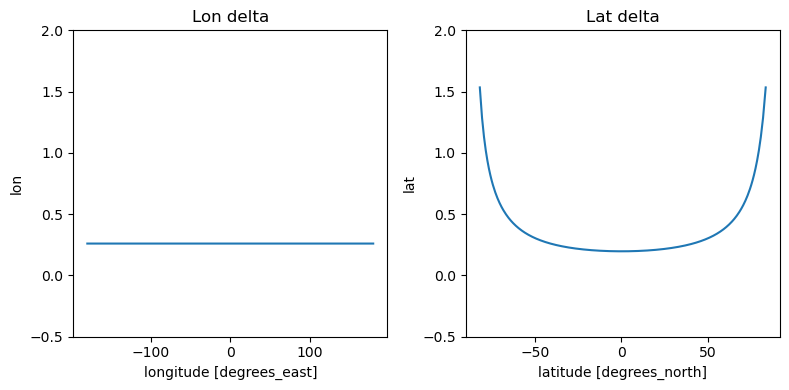

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax1, ax2 = axes
x_delta.plot.line(ax=ax1)
y_delta.plot.line(ax=ax2)
ax1.set_title("Lon delta")
ax1.set_ylim(-0.5, 2.0)
ax2.set_title("Lat delta")
ax2.set_ylim(-0.5, 2.0)
plt.tight_layout()
plt.show()

In [9]:
viewer = Viewer()

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 8.00ms
501 GET /viewer/state?key=sentinel (127.0.0.1) 0.00ms
404 GET /viewer/ext/contributions (127.0.0.1) 0.00ms


In [10]:
viewer.add_dataset(ds, title="Global annual AGC")

'eb33690b-c9ab-40b9-8ede-ee49682a8ffa'

In [11]:
viewer.show()

In [12]:
ds

<xarray.Dataset> Size: 169MB
Dimensions:          (lat: 584, lon: 1388, time: 13)
Coordinates:
  * lat              (lat) float32 2kB -83.52 -81.98 -80.7 ... 80.7 81.98 83.52
  * lon              (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time             (time) datetime64[ns] 104B 2010-01-01 ... 2022-01-01
Data variables:
    crs              |S1 1B ...
    AGC              (time, lat, lon) float32 42MB ...
    AGC_uncertainly  (time, lat, lon) float32 42MB ...
    BC               (time, lat, lon) float32 42MB ...
    BC_uncertainly   (time, lat, lon) float32 42MB ...
Attributes: (12/20)
    Title:              Global annual AGC converted from SMOS-IC L-VOD V2.0
    algorithm_version:  2.0
    input_TB_version:   CATDs SMOStb RE07
    noaa filtering:     Yes
    product_version:    heavy
    creation_time:      22-Aug-2025 09:50:51
    ...                 ...
    Conventions:        1.4
    netcdf_version_id:  3.6.2
    grip_mapping:       projection
    datum:              +ellps = WGS84
    srid:               EPSG:6933
    proj4text:          +proj=cea +lon_0=0 +lat_ts=30 +x_0=0 +y_0=0 +ellps=WG...